<a href="https://colab.research.google.com/github/TheRealKraytonian/DS-Unit-1-Sprint-2-Statistics/blob/master/Copy_of_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!

In [0]:
# EDA and data handling
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from scipy.stats import ttest_ind, ttest_1samp

In [0]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-06-01 03:14:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-06-01 03:15:00 (277 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
column_headers = ['party', 'handicapped-infants', 'water-project', 'budget', 
                 'physician-free-freeze', 'el-salvador-aid', 'religious-groups', 
                 'anti-satellite-ban', 'aid-to-contras', 'mz-missile', 
                 'immigration', 'synfuels', 'education', 
                 'right-to-sue', 'crime', 'duty-free', 
                 'south-africa' ]
house = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?')
house.head()


,party,handicapped-infants,water-project,budget,physician-free-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mz-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
house = house.replace({'y':1, 'n':0})
house.head()

,party,handicapped-infants,water-project,budget,physician-free-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mz-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
rep = house[house['party']=='republican']
dem = house[house['party']=='democrat']

In [0]:
atc = house['aid-to-contras']

In [0]:
atc.head()
atc.value_counts()

1.0    242
0.0    178
Name: aid-to-contras, dtype: int64

In [0]:
def conf_int(data, confidence=0.95):
  mydata = np.array(data)
  mymean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  margin = stderr*stats.t.ppf((1 + confidence)/ 2, n-1)
  return (mymean, mymean - margin, mymean + margin)

In [0]:
conf_int(atc)
#mean, upper bound , lower bound

(0.5761904761904761, 0.5295672514876039, 0.6228137008933484)

In [0]:
atc.mean()

0.5761904761904761

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


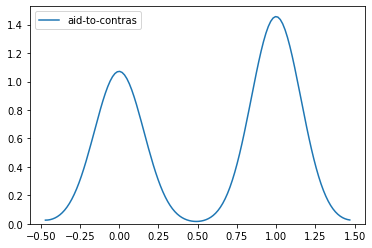

In [0]:
sns.kdeplot(atc)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


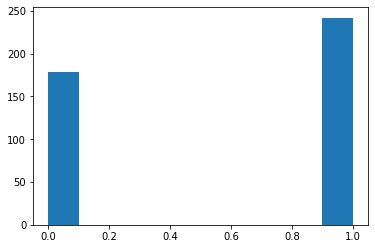

In [0]:
plt.hist(atc);

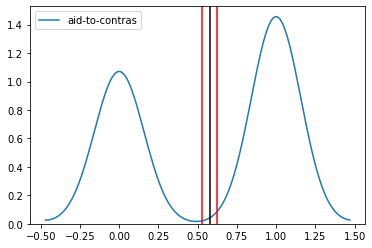

In [0]:
  sns.kdeplot(atc)
  CI = conf_int(atc)
  plt.axvline(x=CI[1], color='red');
  plt.axvline(x=CI[2], color='red');
  plt.axvline(x=CI[0], color='black');

In [0]:
from scipy.stats import t, ttest_1samp  

In [0]:
atc_means = []
for x in range (0,100):
  atc_means.append(atc.mean())

In [0]:
n = len(atc_means)
dof = n-1
grandmean = np.mean(atc_means)
sample_std = np.std(atc_means, ddof=1)
std_err = sample_std/n**.5
CI = t.interval(.95, dof, loc=grandmean, scale=std_err)
print(grandmean, CI)

0.576190476190476 (0.576190476190476, 0.576190476190476)


In [0]:
ttest_1samp(atc_means, .3)

Ttest_1sampResult(statistic=2.4752328853096988e+16, pvalue=0.0)

In [0]:
ttest_1samp(atc_means, .5)

Ttest_1sampResult(statistic=6828228649130193.0, pvalue=0.0)

In [0]:
house.head()

,party,handicapped-infants,water-project,budget,physician-free-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mz-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
house.describe()

,handicapped-infants,water-project,budget,physician-free-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mz-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
house.describe(exclude='number')

,party
count,435
unique,2
top,democrat
freq,267


In [0]:
house['budget'].describe()

count    424.000000
mean       0.596698
std        0.491140
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: budget, dtype: float64

In [0]:
house['budget'].value_counts().sort_index()

0.0    171
1.0    253
Name: budget, dtype: int64

In [0]:
house['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [0]:
xtab = pd.crosstab(house['party'], house['budget'], margins='true')
xtab

budget,0.0,1.0,All
party,,,
democrat,29,231,260
republican,142,22,164
All,171,253,424


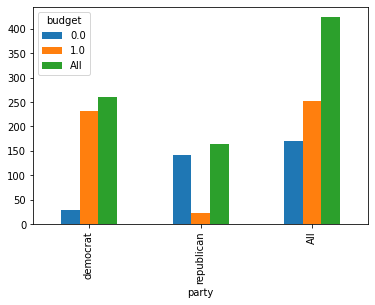

In [0]:
xtab.plot(kind='bar')

In [0]:
xtab

budget,0.0,1.0,All
party,,,
democrat,29,231,260
republican,142,22,164
All,171,253,424


In [0]:
row_sums = xtab.iloc[0:2,2].values
print(row_sums)

[260 164]


In [0]:
col_sums = xtab.iloc[2,0:2].values
print(col_sums)

[171 253]


In [0]:
 total  = xtab.iloc[2,2]
 total

424

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
pde = pd.DataFrame(expected)
pde

,0,1
0,104.858491,155.141509
1,66.141509,97.858491


In [0]:
xtab = pd.crosstab(house['party'], house['budget'])
xtab

budget,0.0,1.0
party,,
democrat,29,231
republican,142,22


In [0]:
expected = pde.to_numpy()

In [0]:
observed = xtab.to_numpy()

In [0]:
chi_squared = ((observed - expected)**2/(expected)).sum()
chi_squared

237.77825519286696

In [0]:
stats.chi2.sf(chi_squared, 1)

1.1999254599463633e-53

In [0]:
stats.chi2_contingency(observed, correction=False, lambda_=None)

(237.778255192867,
 1.199925459946346e-53,
 1,
 array([[104.85849057, 155.14150943],
        [ 66.14150943,  97.85849057]]))

In [0]:
#DoF=(Number of Rows−1)×(Number of Columns−1)
dof = (len(row_sums)-1)*(len(col_sums)-1)

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)